In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
import sort_dataframeby_monthorweek as sd
import plotly.graph_objects as go
from plotly import data

In [21]:
df = pd.read_csv('Fruits_Consumptions_Habits.csv')

In [23]:
df.head()

,ID,Age,Gender,Country,Favorite Fruit,Frequency of Consumption,Preferred Form of Fruit
0,1,32,Male,USA,Apple,Daily,Fresh
1,2,45,Female,Canada,Banana,2-3 times a week,Smoothie
2,3,28,Male,UK,Orange,Once a week,Juice
3,4,50,Female,Australia,Mango,Daily,Fresh
4,5,19,Female,Germany,Strawberry,4-5 times a week,Salad


In [25]:
df.shape

(1438, 7)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        1438 non-null   int64 
 1   Age                       1438 non-null   int64 
 2   Gender                    1438 non-null   object
 3   Country                   1438 non-null   object
 4   Favorite Fruit            1438 non-null   object
 5   Frequency of Consumption  1438 non-null   object
 6   Preferred Form of Fruit   1437 non-null   object
dtypes: int64(2), object(5)
memory usage: 78.8+ KB


In [29]:
print(df.isna().sum())

ID                          0
Age                         0
Gender                      0
Country                     0
Favorite Fruit              0
Frequency of Consumption    0
Preferred Form of Fruit     1
dtype: int64


In [31]:
df.dropna(subset=['Preferred Form of Fruit'],inplace= True)

In [33]:
df['Country'].unique()

array(['USA', 'Canada', 'UK', 'Australia', 'Germany', 'France'],
      dtype=object)

In [35]:
df['Favorite Fruit'].unique()

array(['Apple', 'Banana', 'Orange', 'Mango', 'Strawberry'], dtype=object)

In [37]:
df['Frequency of Consumption'].unique()

array(['Daily', '2-3 times a week', 'Once a week', '4-5 times a week',
       '3-4 times a week'], dtype=object)

In [39]:
df['Preferred Form of Fruit'].unique()

array(['Fresh', 'Smoothie', 'Juice', 'Salad'], dtype=object)

In [101]:
fruit_country = df.groupby(['Country','Favorite Fruit'])['ID'].count().reset_index()
fruit_country

,Country,Favorite Fruit,ID
0,Australia,Apple,59
1,Australia,Banana,59
2,Australia,Mango,59
3,Australia,Orange,59
4,Australia,Strawberry,3
5,Canada,Apple,59
6,Canada,Banana,60
7,Canada,Mango,59
8,Canada,Orange,3
9,Canada,Strawberry,59


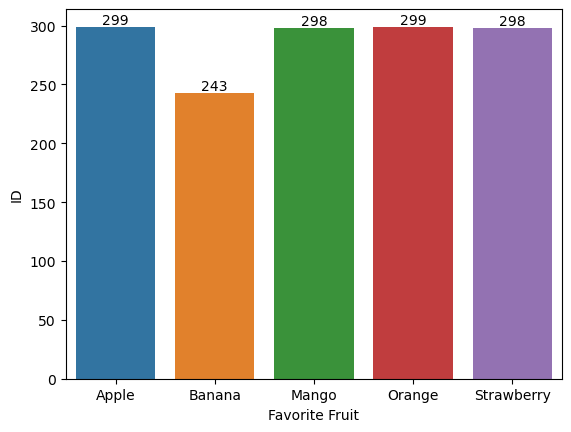

In [103]:
ax = sns.barplot(fruit_country, x='Favorite Fruit', y='ID', errorbar= None, estimator= 'sum')
ax.bar_label(ax.containers[0], fontsize=10);

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



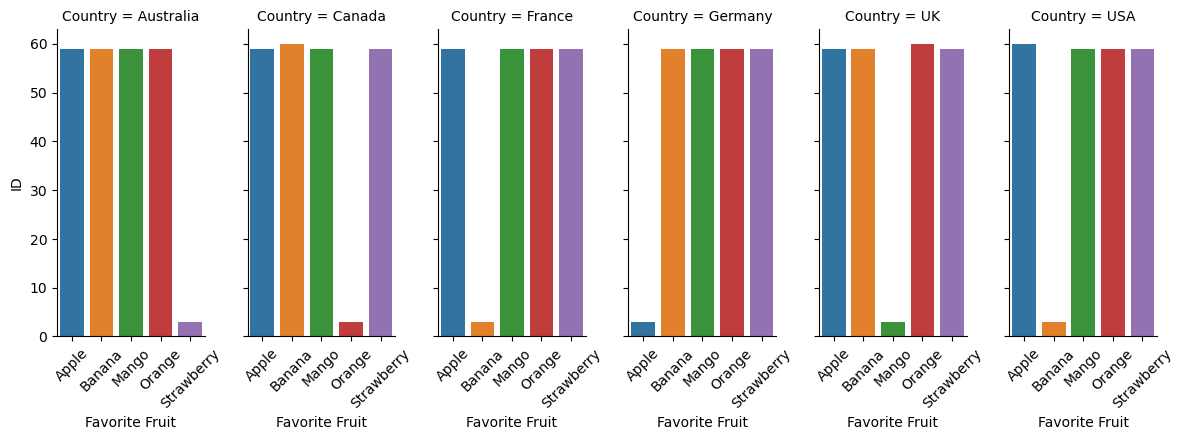

In [161]:
ax = sns.catplot(
    fruit_country, kind="bar",
    x="Favorite Fruit", y="ID", col="Country",
    height=4, aspect=.5)
ax.tick_params(axis = 'x', rotation = 45)

In [118]:
fruit_gender = df.groupby(['Gender','Favorite Fruit'])['ID'].count().reset_index()
fruit_gender

,Gender,Favorite Fruit,ID
0,Female,Apple,176
1,Female,Banana,123
2,Female,Mango,177
3,Female,Orange,121
4,Female,Strawberry,122
5,Male,Apple,123
6,Male,Banana,120
7,Male,Mango,121
8,Male,Orange,178
9,Male,Strawberry,176


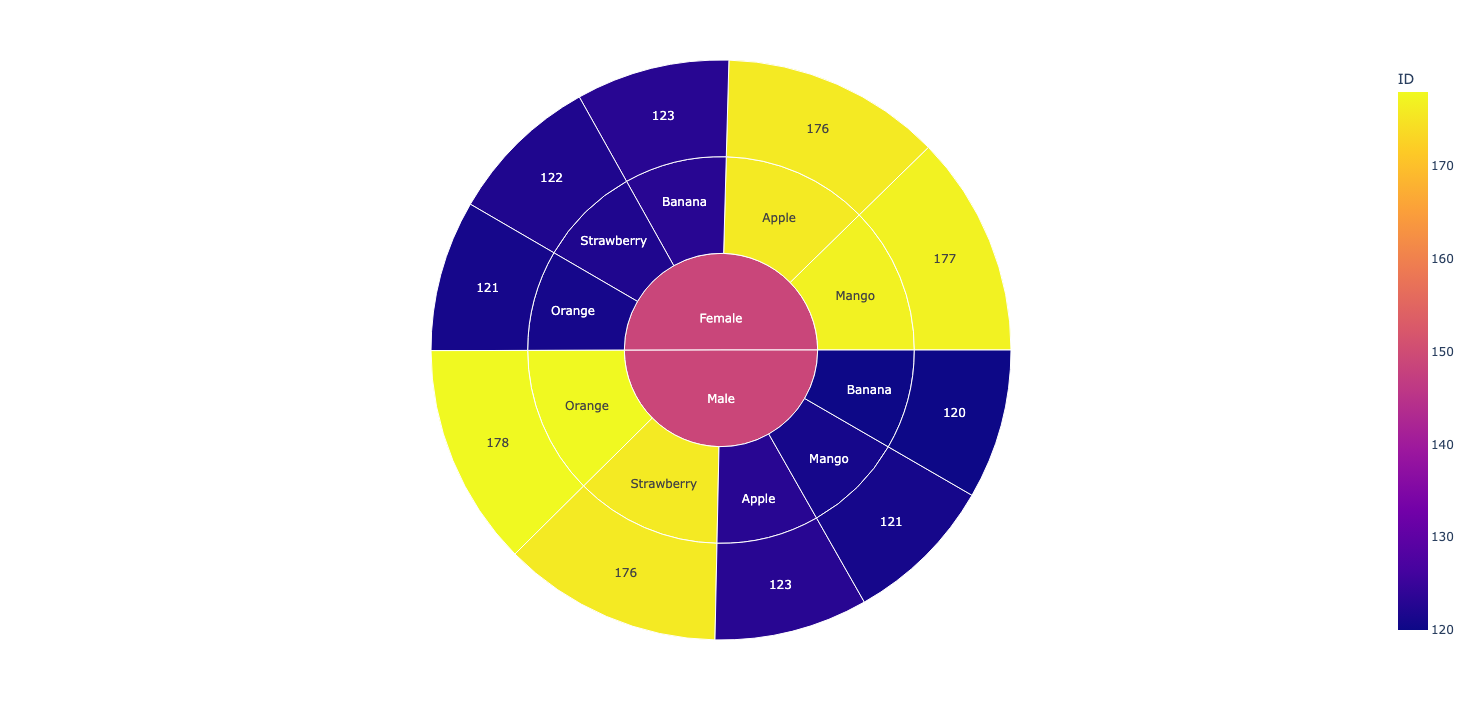

In [308]:
fig = px.sunburst(fruit_gender, path=['Gender','Favorite Fruit','ID'], values='ID', color='ID')
fig.show()

In [149]:
fruit_consumption = df.groupby(['Favorite Fruit','Preferred Form of Fruit'])['ID'].count().reset_index()
fruit_consumption

,Favorite Fruit,Preferred Form of Fruit,ID
0,Apple,Fresh,298
1,Apple,Smoothie,1
2,Banana,Fresh,3
3,Banana,Smoothie,240
4,Mango,Fresh,298
5,Orange,Juice,299
6,Strawberry,Fresh,2
7,Strawberry,Salad,3
8,Strawberry,Smoothie,293


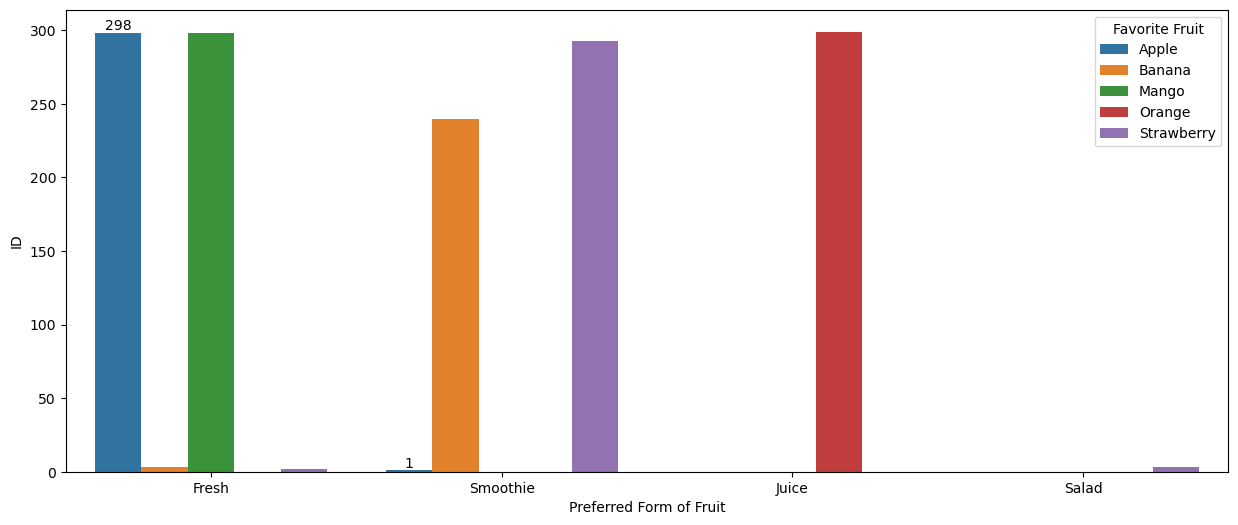

In [165]:
plt.figure(figsize = (15,6))
ax =sns.barplot(data = fruit_consumption, x = 'Preferred Form of Fruit', y = 'ID', errorbar = None, hue = 'Favorite Fruit')
ax.bar_label(ax.containers[0], fontsize=10);

In [173]:
country_age_frequency = df.groupby(['Country','Gender','Frequency of Consumption','Age'])['ID'].count().reset_index()
country_age_frequency

,Country,Gender,Frequency of Consumption,Age,ID
0,Australia,Female,2-3 times a week,26,1
1,Australia,Female,2-3 times a week,28,53
2,Australia,Female,2-3 times a week,43,1
3,Australia,Female,2-3 times a week,46,2
4,Australia,Female,3-4 times a week,30,1
...,...,...,...,...,...
104,USA,Male,Once a week,18,56
105,USA,Male,Once a week,34,2
106,USA,Male,Once a week,53,54
107,USA,Male,Once a week,54,53


In [175]:
mean_age = country_age_frequency.groupby('Country')['Age'].mean().reset_index().round()
mean_age

,Country,Age
0,Australia,36.0
1,Canada,33.0
2,France,39.0
3,Germany,28.0
4,UK,39.0
5,USA,46.0


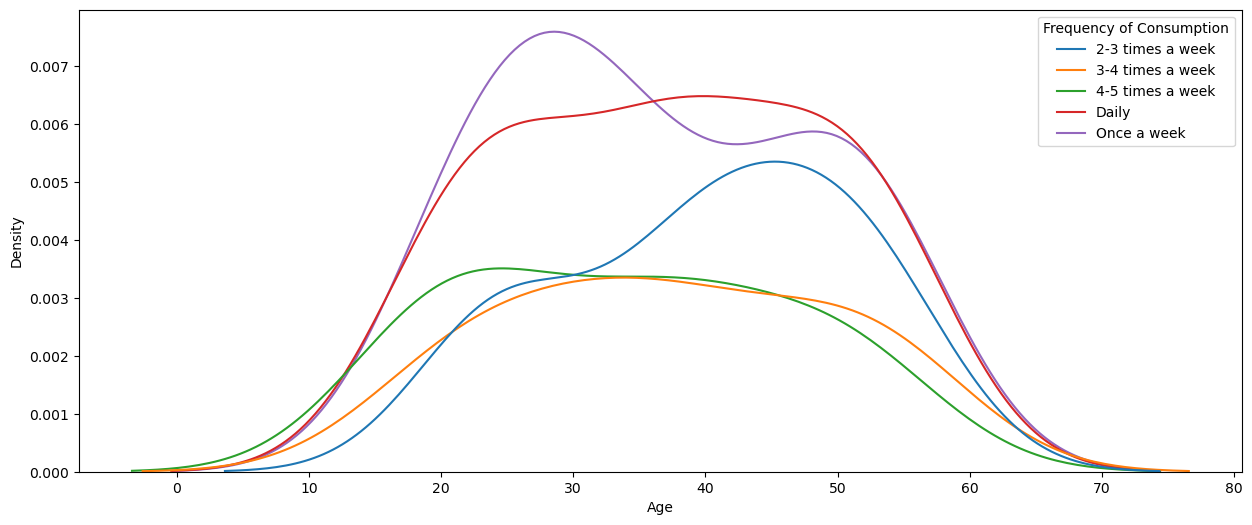

In [189]:
plt.figure(figsize = (15,6))
ax = sns.kdeplot(
   data=country_age_frequency, x="Age", hue="Frequency of Consumption"
)